In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
import seaborn as sns

# https://www.kff.org/other/state-indicator/opioid-overdose-death-rates/?currentTimeframe=1&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D

In [6]:
rx_state_df = pd.read_csv('data/opioid_rx_state_level.csv')
rx_state_df = rx_state_df.drop(columns=['Unnamed: 3'])
rx_state_df.sort_values(by='Dispensing_Rate', ascending=False).head(10)

,Year,State,Dispensing_Rate
201,2009,WV,146.9
150,2008,WV,145.5
306,2012,AL,143.8
252,2010,WV,143.1
357,2013,AL,142.4
246,2010,TN,140.0
303,2011,WV,139.6
297,2011,TN,138.5
195,2009,TN,138.4
272,2011,KY,137.0


In [13]:
rx_state_df.isnull().sum()

Year               0
State              0
Dispensing_Rate    0
dtype: int64

In [24]:
death_state_df = pd.read_csv('data/opioid_deaths_state.csv')
death_state_df[death_state_df['Opioid Overdose Death Rate (Age-Adjusted)'].isin(['NSD', 'NR'])]

,Year,State,Opioid Overdose Death Rate (Age-Adjusted),All Drug Overdose Death Rate (Age-Adjusted)
34,2006,ND,NSD,NR
50,2006,WY,NR,10.6
52,2007,AK,NR,10.1
85,2007,ND,NR,4.8
161,2009,DC,NSD,4.1
187,2009,ND,NSD,4.4
238,2010,ND,NSD,3.4
289,2011,ND,NSD,NSD
340,2012,ND,NSD,3.1
391,2013,ND,NSD,2.8


In [25]:
death_state_df = death_state_df[~death_state_df['Opioid Overdose Death Rate (Age-Adjusted)'].isin(['NSD', 'NR'])]
death_state_df['Opioid Overdose Death Rate (Age-Adjusted)'] = death_state_df['Opioid Overdose Death Rate (Age-Adjusted)'].astype(float)
death_state_df.sort_values(by='Opioid Overdose Death Rate (Age-Adjusted)', ascending=False).head(10)

,Year,State,Opioid Overdose Death Rate (Age-Adjusted),All Drug Overdose Death Rate (Age-Adjusted)
762,2020,WV,70.0,81.4
609,2017,WV,49.6,57.8
722,2020,DC,45.3,58.1
721,2020,DE,43.9,47.3
558,2016,WV,43.4,52
670,2019,DE,43.0,48
660,2018,WV,42.4,51.5
711,2019,WV,41.4,52.8
734,2020,MD,40.4,44.6
731,2020,KY,40.2,49.2


Text(0, 0.5, 'Opioid Dispensing Rate')

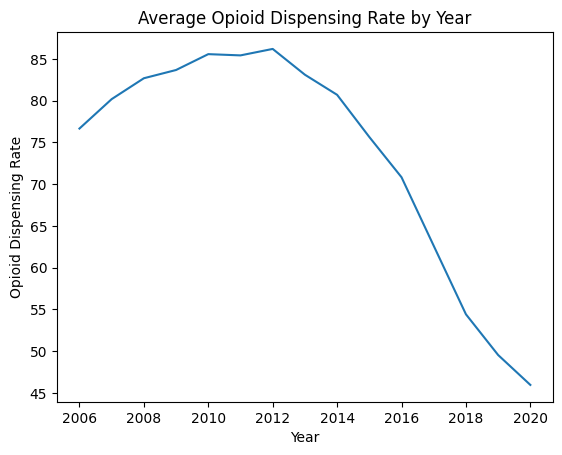

In [18]:
rx_state_df.groupby('Year').Dispensing_Rate.mean().plot.line()
plt.title('Average Opioid Dispensing Rate by Year')
plt.ylabel('Opioid Dispensing Rate')

Text(0, 0.5, 'Opioid Overdose Death Rate')

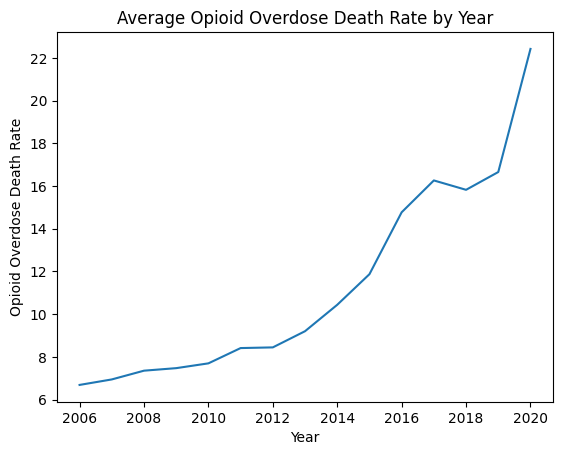

In [26]:
death_state_df.groupby('Year')['Opioid Overdose Death Rate (Age-Adjusted)'].mean().plot.line()
plt.title('Average Opioid Overdose Death Rate by Year')
plt.ylabel('Opioid Overdose Death Rate')

In [27]:
rx_death = pd.merge(rx_state_df, death_state_df, on=['State', 'Year'])
rx_death.sample(5)

,Year,State,Dispensing_Rate,Opioid Overdose Death Rate (Age-Adjusted),All Drug Overdose Death Rate (Age-Adjusted)
58,2007,GA,82.5,4.1,9.7
50,2007,AZ,77.8,7.7,15.7
17,2006,KY,122.6,8.0,17.4
475,2015,MT,73.3,5.0,13.8
48,2006,WI,64.7,6.0,10.6


Text(0.5, 0, 'Opioid Dispensing Rate')

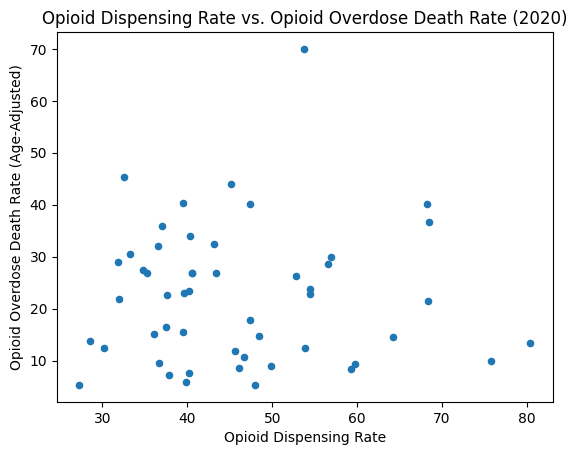

In [32]:
rx_death[rx_death.Year == 2020].plot.scatter(x='Dispensing_Rate', y='Opioid Overdose Death Rate (Age-Adjusted)')
plt.title('Opioid Dispensing Rate vs. Opioid Overdose Death Rate (2020)')
plt.xlabel('Opioid Dispensing Rate')